In [258]:
import torch

In [259]:
BATCH_SIZE = 5
T=10

In [260]:
 t = torch.randint(0, T, (BATCH_SIZE,)).long()

In [1]:
import librosa
import numpy as np
from utills import *

In [262]:
def invert_magnitude_to_audio(magnitude, hop_length):
    # Initialize a random phase
    phase = np.random.randn(*magnitude.shape)
    
    # Reconstruct the waveform using Griffin-Lim algorithm
    for i in range(100):
        # Synthesize complex spectrogram
        complex_spectrogram = magnitude * np.exp(1j * phase)
        
        # Inverse STFT to reconstruct waveform
        waveform = librosa.istft(complex_spectrogram, hop_length=hop_length)
        
        # Compute the new phase
        _, phase = librosa.magphase(librosa.stft(waveform, hop_length=hop_length))
    
    return waveform

In [263]:
waveform, sample_rate = librosa.load("data/VCTK-Corpus/wav48/p226/p226_002.wav", sr=16000)

In [264]:
stft = get_stft(waveform)

In [265]:
waveform2, sample_rate = librosa.load("data/VCTK-Corpus/wav48/p310/p310_002.wav", sr=16000)

In [266]:
stft2 = get_stft(waveform2)

In [267]:
hop_length = 512
n_fft = 2048
stft = librosa.stft(waveform, n_fft=n_fft, hop_length=hop_length)
magnitude, phase = librosa.magphase(stft)



In [268]:
# Reconstruct the waveform using the inverse STFT
waveform_reg = librosa.istft(magnitude * phase, hop_length=hop_length)


In [269]:
print(stft.shape)
print(stft2.shape)

(1025, 149)
(1025, 185)


In [270]:
def preprocess_audio(audio_path, noise_path_list, sampling_rate):
    # Load the audio file
    waveform, _ = librosa.load(audio_path, sr=sampling_rate)
    
    # Load a random noise file
    random_noise = noise_path_list #np.random.choice(noise_path_list)
    noise, _ = librosa.load(random_noise, sr=sampling_rate)
    
    # Define desired length (2 seconds)
    desired_length = sampling_rate * 2
    
    # If the waveform is shorter than the desired length, pad it with zeros
    if len(waveform) < desired_length:
        padding = desired_length - len(waveform)
        waveform = np.pad(waveform, (0, padding), 'constant')
    
    # If the noise is shorter than the desired length, pad it with zeros
    if len(noise) < desired_length:
        padding = desired_length - len(noise)
        noise = np.pad(noise, (0, padding), 'constant')
    
    # If the waveform is longer than 2 seconds, take the middle 2 seconds
    if len(waveform) > desired_length:
        start = (len(waveform) - desired_length) // 2
        waveform = waveform[start:start + desired_length]
    
    # If the noise is longer than 2 seconds, take the first 2 seconds
    if len(noise) > desired_length:
        noise = noise[:desired_length]
    
    return waveform, noise

In [271]:
waveform,noise = preprocess_audio("data/VCTK-Corpus/wav48/p310/p310_002.wav","data/noise/sample-2.wav",16000)

In [2]:
from params import *

In [4]:
test_data = load_data('data/VCTK-Corpus/wav48', "test", batch_size=1)

Total files found: 442
test dataset length: 89


In [5]:
clean, noise = test_data.dataset.__getitem__(66)

In [6]:
for clean, noise in test_data:
    print(clean.shape)
    print(noise.shape)
    break

torch.Size([1, 32000])
torch.Size([1, 32000])


In [297]:
noise.shape

torch.Size([1, 16000])

In [8]:
import soundfile as sf
sf.write("test_noise.wav", noise.detach().squeeze(0).numpy(), 16000)
sf.write("test_clean.wav", clean.detach().squeeze(0).numpy(), 16000)

In [275]:
stft = get_stft(waveform)
stft.shape

(1025, 63)

In [276]:
type(waveform)

numpy.ndarray

In [277]:
hop_length = 512

# Reconstruct the waveform using the inverse STFT
waveform_regenerate = librosa.istft(magnitude * phase, hop_length=hop_length)

In [278]:
waveform_regenerate.shape

(75776,)

In [2]:
# Function to plot spectrograms
def plot_spectrograms(clean_wave, noisy_wave, enhanced_wave, sr=16000):
    plt.figure(figsize=(15, 5))

    # Clean wave spectrogram
    plt.subplot(1, 3, 1)
    clean_spec = librosa.feature.melspectrogram(y=clean_wave, sr=sr)
    librosa.display.specshow(librosa.power_to_db(clean_spec, ref=np.max), sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Clean Wave Spectrogram')

    # Noisy wave spectrogram
    plt.subplot(1, 3, 2)
    noisy_spec = librosa.feature.melspectrogram(y=noisy_wave, sr=sr)
    librosa.display.specshow(librosa.power_to_db(noisy_spec, ref=np.max), sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Noisy Wave Spectrogram')

    # Enhanced wave spectrogram
    plt.subplot(1, 3, 3)
    enhanced_spec = librosa.feature.melspectrogram(y=enhanced_wave, sr=sr)
    librosa.display.specshow(librosa.power_to_db(enhanced_spec, ref=np.max), sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Enhanced Wave Spectrogram')

    plt.tight_layout()
    plt.show()

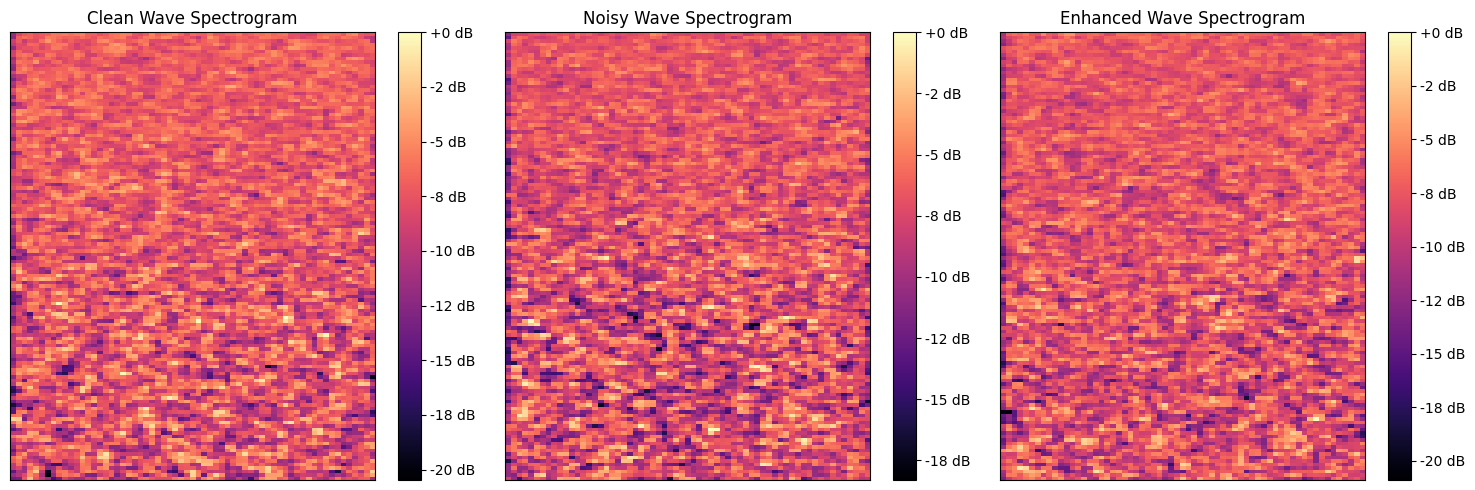

In [4]:
# Example waves (replace with your own)
clean_wave = np.random.randn(32000)  # Example clean wave (random)
noisy_wave = np.random.randn(32000)  # Example noisy wave (random)
enhanced_wave = np.random.randn(32000)  # Example enhanced wave (random)

# Plot the spectrograms
plot_spectrograms(clean_wave, noisy_wave, enhanced_wave, sr=16000)